**Step 1: Import all of the libraries I need & import the .csv file that I will be working on**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CovidByCounty_df = pd.read_csv("https://storage.googleapis.com/files.mobibootcamp.com/2020-datafiles/Covid-19_Tests_by_County_2020-09-17_702630_7.csv")
CovidByCounty_df.head()

,COUNTY,TestType,Count,RatePerMillion,Updated
0,Alcona,Diagnostic,1974,189716.0,2020/09/17 13:31:36
1,Alcona,Serology,51,4901.0,2020/09/17 13:31:36
2,Alcona,Total,2025,194618.0,2020/09/17 13:31:36
3,Alger,Serology,66,7246.0,2020/09/17 13:31:36
4,Alger,Diagnostic,1156,126921.0,2020/09/17 13:31:36


**Step 2: Run a quick Summary Statistics on the data table**

In [ ]:
CovidByCounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COUNTY          258 non-null    object 
 1   TestType        258 non-null    object 
 2   Count           258 non-null    int64  
 3   RatePerMillion  252 non-null    float64
 4   Updated         258 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.2+ KB


In [ ]:
CovidByCounty_df.describe()

,Count,RatePerMillion
count,258.000000,252.000000
mean,27644.968992,180129.607143
std,65158.329621,139107.491391
min,15.000000,1536.000000
25%,1227.000000,15437.750000
50%,4949.500000,194775.500000
75%,18437.000000,281410.750000
max,416039.000000,510392.000000


*Some initial observations:*


*   *There are a total of tive columns: two of the columns contain quantitative data types, and three contain qualitative data types*
*   *The Rate per Million column appears to be missing some data*



**Step 3: Decide what to do with null values**

In [ ]:
is_NaN = CovidByCounty_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = CovidByCounty_df[row_has_NaN]
print(rows_with_NaN)

           COUNTY    TestType   Count  RatePerMillion              Updated
57   Correctional    Serology   10990             NaN  2020/09/17 13:31:36
58   Correctional  Diagnostic   83705             NaN  2020/09/17 13:31:36
59   Correctional       Total   94695             NaN  2020/09/17 13:31:36
243       Unknown    Serology   19839             NaN  2020/09/17 13:31:36
244       Unknown  Diagnostic  223551             NaN  2020/09/17 13:31:36
245       Unknown       Total  243390             NaN  2020/09/17 13:31:36


These are the six rows in the data that have null values. Notice that in the County column, the row data is referring to "Correctional" and "Unknown." Correctional most likely refers to the correctional facilities in the state; unsure of what the unknown data is supposed to represent. I am not sure if the correctional data is lumped in with the counts of the counties that each individual correctional facility if housed, so I think the best thing to do is to remove these rows from our dataset 

In [ ]:
CovidByCounty_df1 = CovidByCounty_df.dropna()
CovidByCounty_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 257
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COUNTY          252 non-null    object 
 1   TestType        252 non-null    object 
 2   Count           252 non-null    int64  
 3   RatePerMillion  252 non-null    float64
 4   Updated         252 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 11.8+ KB


Another thing I noticed when looking at this data set; there are separate rows for the city of Detroit. Since the city of Detroit is within Wayne County, I don't want to double count those results in my sample since those values are wrapped in Wayne County's values; therefore I will also be dropping the rows that show "Detroit City" from my dataset. This will leave me with 249 rows of data to use for my analysis.

In [ ]:
CovidByCounty_df2 = CovidByCounty_df1[CovidByCounty_df1.COUNTY != 'Detroit City']
CovidByCounty_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 257
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COUNTY          249 non-null    object 
 1   TestType        249 non-null    object 
 2   Count           249 non-null    int64  
 3   RatePerMillion  249 non-null    float64
 4   Updated         249 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 11.7+ KB


**Step 4: Add Dictionaries & Create New Categorical Column**

In [ ]:
Counties_By_Region = {'Midland':'Southeast' , 'Bay':'Southeast' , 'Saginaw':'Southeast' , 'Shiawassee':'Southeast' , 'Ingham':'Southeast' , 'Jackson':'Southeast' , 'Hillsdale':'Southeast' , 'Lenawee':'Southeast' , 'Monroe':'Southeast' , 'Wayne':'Southeast' , 'Macomb':'Southeast' , 'St Clair':'Southeast' , 'Sanilac':'Southeast' , 'Huron':'Southeast' , 'Tuscola':'Southeast' , 'Genesee':'Southeast' , 'Livingston':'Southeast' , 'Washtenaw':'Southeast' , 'Oakland':'Southeast' , 'Lapeer':'Southeast' , 'Isabella':'Southwest' , 'Mecosta':'Southwest' , 'Newaygo':'Southwest' , 'Oceana':'Southwest' , 'Muskegon':'Southwest' , 'Ottawa':'Southwest' , 'Allegan':'Southwest' , 'Van Buren':'Southwest' , 'Berrien':'Southwest' , 'Cass':'Southwest' , 'St Joseph':'Southwest' , 'Branch':'Southwest' , 'Calhoun':'Southwest' , 'Eaton':'Southwest' , 'Clinton':'Southwest' , 'Gratiot':'Southwest' ,'Montcalm':'Southwest' , 'Kent':'Southwest' , 'Ionia':'Southwest' , 'Barry':'Southwest' , 'Kalamazoo':'Southwest' , 'Arenac':'Northeast' , 'Gladwin':'Northeast' , 'Roscommon':'Northeast' , 'Crawford':'Northeast' , 'Otsego':'Northeast' , 'Cheboygan':'Northeast' , 'Presque Isle':'Northeast' , 'Alpena':'Northeast' , 'Alcona':'Northeast' , 'Iosco':'Northeast' , 'Ogemaw':'Northeast' , 'Oscoda':'Northeast' , 'Montmorency':'Northeast' , 'Clare':'Northwest' ,  'Osceola':'Northwest' , 'Lake':'Northwest' , 'Mason':'Northwest' , 'Manistee':'Northwest' , 'Benzie':'Northwest' , 'Leelanau':'Northwest' , 'Emmet':'Northwest' , 'Charlevoix':'Northwest' , 'Antrim':'Northwest' , 'Kalkaska':'Northwest' , 'Missaukee':'Northwest' , 'Wexford':'Northwest' , 'Grand Traverse':'Northwest' , 'Chippewa':'Upper Peninsula' ,  'Mackinac':'Upper Peninsula' , 'Luce':'Upper Peninsula' , 'Schoolcraft':'Upper Peninsula' , 'Alger':'Upper Peninsula' , 'Delta':'Upper Peninsula' , 'Menominee':'Upper Peninsula' , 'Dickinson':'Upper Peninsula' , 'Marquette':'Upper Peninsula' , 'Iron':'Upper Peninsula' , 'Baraga':'Upper Peninsula' , 'Houghton':'Upper Peninsula' , 'Keweenaw':'Upper Peninsula' , 'Ontonagon':'Upper Peninsula' , 'Gogebic':'Upper Peninsula'}
CovidByCounty_df2["Region"] = CovidByCounty_df2['COUNTY'].map(Counties_By_Region)
CovidByCounty_df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,COUNTY,TestType,Count,RatePerMillion,Updated,Region
0,Alcona,Diagnostic,1974,189716.0,2020/09/17 13:31:36,Northeast
1,Alcona,Serology,51,4901.0,2020/09/17 13:31:36,Northeast
2,Alcona,Total,2025,194618.0,2020/09/17 13:31:36,Northeast
3,Alger,Serology,66,7246.0,2020/09/17 13:31:36,Upper Peninsula
4,Alger,Diagnostic,1156,126921.0,2020/09/17 13:31:36,Upper Peninsula
...,...,...,...,...,...,...
253,Wayne,Serology,40636,36814.0,2020/09/17 13:31:36,Southeast
254,Wayne,Total,416039,376911.0,2020/09/17 13:31:36,Southeast
255,Wexford,Diagnostic,7712,229312.0,2020/09/17 13:31:36,Northwest
256,Wexford,Serology,230,6839.0,2020/09/17 13:31:36,Northwest


Before I start my analysis, I want to group my counties based on what region of the state they are in. To do this, I divided up the counties in the lower peninsula into four quadrants:
*    Northeast
*    Northwest
*    Southeast
*    Southwest


I also added a region for all of the counties in the Upper Peninsula

**Step 5: General Analysis**

*Before I start, I think it's important to define some terms. There are two tests that are being given to patients in Michigan: Diagnostic tests and Serology Tests. Here is a brief definition of both:*
*   *Diagnostic Test is performed to see if the patient has Covid. These are done typically with nasal swabbing.*
*   *Serology test is performed to see if the patient had covid at some point. These are done by looking for antibodies in the blood.*

*There is also a column of data given that is stated as "Rate Per Million." I went back to the source of the original dataset and was unable to find a concrete definition for this variable, so I'm going to take the liberty to define it based on what I **THINK** it is. Going forward, I am going to define this variable as the **INFECTION** Rate per Million.*

In [ ]:
CovidByCounty_Total = CovidByCounty_df2.loc[CovidByCounty_df2['TestType'] == 'Total']
CovidByCounty_Diagnostic = CovidByCounty_df2.loc[CovidByCounty_df2['TestType'] == 'Diagnostic']
CovidByCounty_Serology = CovidByCounty_df2.loc[CovidByCounty_df2['TestType'] == 'Serology']
CBC_Diag_SE = CovidByCounty_Diagnostic.loc[CovidByCounty_Diagnostic['Region'] == 'Southeast']
CBC_Diag_SW = CovidByCounty_Diagnostic.loc[CovidByCounty_Diagnostic['Region'] == 'Southwest']
CBC_Diag_NE = CovidByCounty_Diagnostic.loc[CovidByCounty_Diagnostic['Region'] == 'Northeast']
CBC_Diag_NW = CovidByCounty_Diagnostic.loc[CovidByCounty_Diagnostic['Region'] == 'Northwest']
CBC_Diag_UP = CovidByCounty_Diagnostic.loc[CovidByCounty_Diagnostic['Region'] == 'Upper Peninsula']

CBC_Serol_SE = CovidByCounty_Serology.loc[CovidByCounty_Serology['Region'] == 'Southeast']
CBC_Serol_SW = CovidByCounty_Serology.loc[CovidByCounty_Serology['Region'] == 'Southwest']
CBC_Serol_NE = CovidByCounty_Serology.loc[CovidByCounty_Serology['Region'] == 'Northeast']
CBC_Serol_NW = CovidByCounty_Serology.loc[CovidByCounty_Serology['Region'] == 'Northwest']
CBC_Serol_UP = CovidByCounty_Serology.loc[CovidByCounty_Serology['Region'] == 'Upper Peninsula']

First thing I want to look at are the Serology counts, the Diagnostic counts, and the Total counts separately. To do this, I created three separate dataframes that filter off of the dataframe that has already been cleaned. After I did that step, I ran the describe function to make sure that the filter worked.

In [ ]:
percent_serology = round((CovidByCounty_Serology['Count'].sum() / CovidByCounty_Total['Count'].sum())*100, 0)
print(int(percent_serology))
percent_diagnostic = round((CovidByCounty_Diagnostic['Count'].sum() / CovidByCounty_Total['Count'].sum())*100, 0)
print(int(percent_diagnostic))

8
92


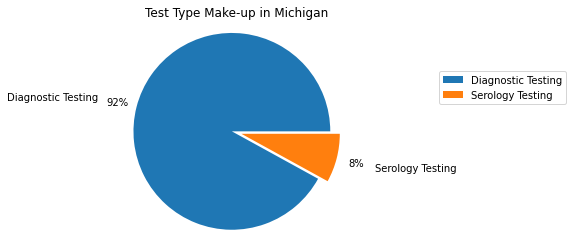

In [ ]:
fig, ax = plt.subplots()

labels = ['Diagnostic Testing',
         'Serology Testing']
percentages = [percent_diagnostic, percent_serology]
explode=(0.1,0)

ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=0, pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')

ax.set_title("Test Type Make-up in Michigan")
ax.legend(frameon=True, bbox_to_anchor=(1.5,0.8))
plt.show()

The pie chart above shows the test type make up of the data table. So 92% of all the tests done in the State of Michigan are the diagnostic tests, and the remaining 8% are the serology tests. This makes sense due to diagnostic tests being a quick nasal swab that can be done from a drive throughand a serology test being a blood draw, which is a sit-down process.

In [ ]:
percent_diaSE = round((CBC_Diag_SE['Count'].sum() / CovidByCounty_Diagnostic['Count'].sum())*100 + 1, 0)
print(int(percent_diaSE))
percent_diaSW = round((CBC_Diag_SW['Count'].sum() / CovidByCounty_Diagnostic['Count'].sum())*100, 0)
print(int(percent_diaSW))
percent_diaNE = round((CBC_Diag_NE['Count'].sum() / CovidByCounty_Diagnostic['Count'].sum())*100, 0)
print(int(percent_diaNE))
percent_diaNW = round((CBC_Diag_NW['Count'].sum() / CovidByCounty_Diagnostic['Count'].sum())*100, 0)
print(int(percent_diaNE))
percent_diaUP = round((CBC_Diag_UP['Count'].sum() / CovidByCounty_Diagnostic['Count'].sum())*100, 0)
print(int(percent_diaUP))

62
31
2
2
3


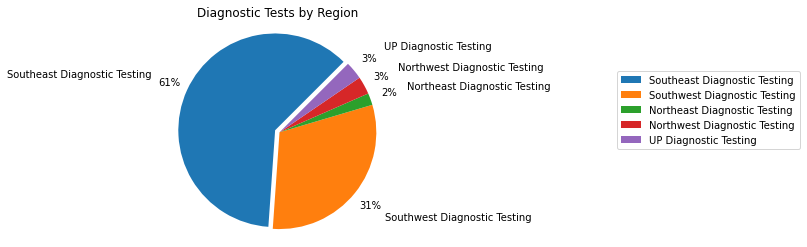

In [ ]:
fig, ax = plt.subplots()

labels = ['Southeast Diagnostic Testing',
         'Southwest Diagnostic Testing' , 'Northeast Diagnostic Testing' , 'Northwest Diagnostic Testing' , 'UP Diagnostic Testing']
percentages = [percent_diaSE , percent_diaSW , percent_diaNE , percent_diaNW , percent_diaUP]
explode=(0.05,0,0,0,0)

ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=45, pctdistance=1.2,labeldistance=1.4)

ax.set_title("Diagnostic Tests by Region")
ax.legend(loc = 'upper left' , frameon=True, bbox_to_anchor=(1.5,0.8))

ax.axis('equal')
plt.show()

The piechart above breaks out the proportion of Diagnostic Tests by region. As you can see, the Southeast region of the state has performed the overwhelming majority of diagnostic testing, followed by the Southwest region. 

In [ ]:
percent_serolSE = round((CBC_Serol_SE['Count'].sum() / CovidByCounty_Serology['Count'].sum())*100 + 1, 0)
print(int(percent_serolSE))
percent_serolSW = round((CBC_Serol_SW['Count'].sum() / CovidByCounty_Serology['Count'].sum())*100, 0)
print(int(percent_serolSW))
percent_serolNE = round((CBC_Serol_NE['Count'].sum() / CovidByCounty_Serology['Count'].sum())*100, 0)
print(int(percent_serolNE))
percent_serolNW = round((CBC_Serol_NW['Count'].sum() / CovidByCounty_Serology['Count'].sum())*100, 0)
print(int(percent_serolNE))
percent_serolUP = round((CBC_Serol_UP['Count'].sum() / CovidByCounty_Serology['Count'].sum())*100, 0)
print(int(percent_serolUP))

80
17
1
1
1


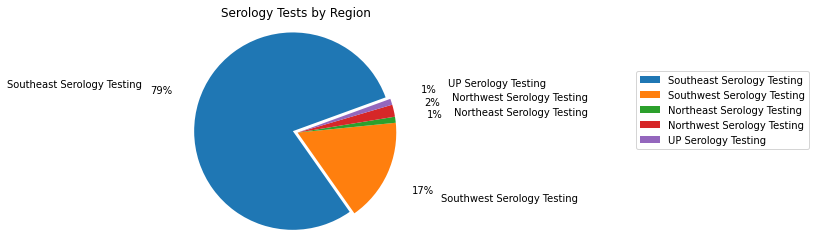

In [ ]:
fig, ax = plt.subplots()

labels = ['Southeast Serology Testing',
         'Southwest Serology Testing' , 'Northeast Serology Testing' , 'Northwest Serology Testing' , 'UP Serology Testing']
percentages = [percent_serolSE , percent_serolSW , percent_serolNE , percent_serolNW , percent_serolUP]
explode=(0.05,0,0,0,0)

ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=20, pctdistance=1.4,labeldistance=1.6)

ax.set_title("Serology Tests by Region")
ax.legend(loc = 'upper left' , frameon=True, bbox_to_anchor=(1.5,0.8))

ax.axis('equal')
plt.show()

As with the previous piechart, the chart above looks at the proportion of Serology Tests by region. Similar to diagnostic testing, serology tests are being performed primarily in the Southeast regaion followed by the Southwest

**Step 5: Deeper Analysis - Southeast Michigan**

As shown in the pie charts above, a majority of the testing is taking place in the Southeast region of Michigan. This shouldn't be too surprising, given that the region has the heaviest population out of all the other regions. This section will take a closer look at the Southeast part of the state

In [ ]:
CovidByCounty_TotalSE = CovidByCounty_df2.loc[CovidByCounty_df2['Region'] == 'Southeast']
CovidByCounty_TotalSE

,COUNTY,TestType,Count,RatePerMillion,Updated,Region
24,Bay,Diagnostic,33152,321471.0,2020/09/17 13:31:36,Southeast
25,Bay,Serology,1737,16843.0,2020/09/17 13:31:36,Southeast
26,Bay,Total,34889,338314.0,2020/09/17 13:31:36,Southeast
78,Genesee,Diagnostic,89810,221309.0,2020/09/17 13:31:36,Southeast
79,Genesee,Serology,10648,26239.0,2020/09/17 13:31:36,Southeast
80,Genesee,Total,100458,247548.0,2020/09/17 13:31:36,Southeast
93,Hillsdale,Serology,294,6447.0,2020/09/17 13:31:36,Southeast
94,Hillsdale,Diagnostic,10679,234163.0,2020/09/17 13:31:36,Southeast
95,Hillsdale,Total,10973,240610.0,2020/09/17 13:31:36,Southeast
99,Huron,Diagnostic,8883,286724.0,2020/09/17 13:31:36,Southeast


So I created a data frame that has all of the testing data that only shows counties in Southeast Michigan

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


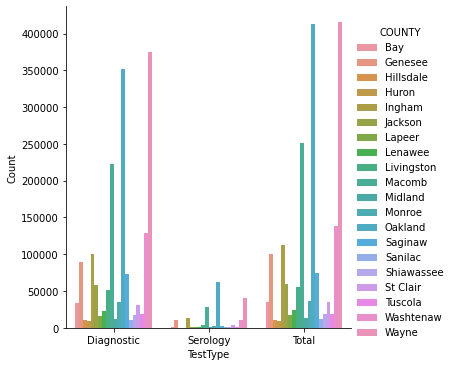

In [ ]:
sns.factorplot(x = 'TestType' , y = 'Count' , hue = 'COUNTY' , data = CovidByCounty_TotalSE , kind = 'bar')
plt.show()

Running a quick barplot that breaks out testing type counts by county, we can see that the heaviest numbers are coming from Wayne, Oakland, and Macomb counties respectively.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


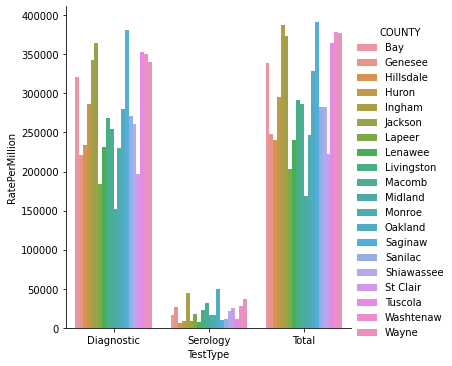

In [ ]:
sns.factorplot(x = 'TestType' , y = 'RatePerMillion' , hue = 'COUNTY' , data = CovidByCounty_TotalSE , kind = 'bar')
plt.show()

Here is a quick bar plot that looks at the Rate Per Million. As stated above in step 5, I am interpreting this variable as the rate of infection per million. Since this variable is not clearly defined, I haven't used it up until now. Back to the bar plot: I'm noticing that the three largest counties based on population size do not have the highest infection per million rate. What could be happening here is the less populated counties in SOutheast Michigan might be experiencing similar rates of infection as the more populated counties, but when per million is factored in, those rates appear higher. 

In [ ]:
CBC_TotalSEQuant = CovidByCounty_TotalSE.drop(['COUNTY' , 'TestType' , 'Updated' , 'Region'] , axis = 1)
CBC_TotalSEQuant

,Count,RatePerMillion
24,33152,321471.0
25,1737,16843.0
26,34889,338314.0
78,89810,221309.0
79,10648,26239.0
80,100458,247548.0
93,294,6447.0
94,10679,234163.0
95,10973,240610.0
99,8883,286724.0


In [ ]:
CBC_TotalSEQuant.corr()

,Count,RatePerMillion
Count,1.000000,0.467099
RatePerMillion,0.467099,1.000000


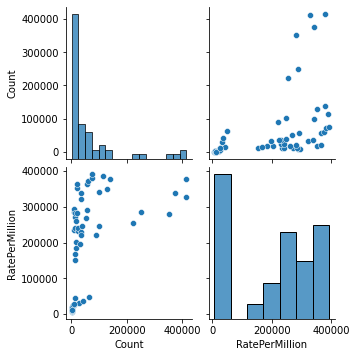

In [ ]:
sns.pairplot(CBC_TotalSEQuant)

What I did here was strip away the qualitative data from the data frame in order to run the correlation matrix and subsequent sub-pairplot correlation matrix in Seaborn. There is a 46.7% correlation between testing and the infection rate per million in Southeast Michigan. Looking at both scatterplots that were produced from the code, there's a clear positive trend in the plotpoints that increases both on the x and y axis'. The histograms show the distribution of values for both Test Count and Infection Rate Per Million. Both histograms show a positive skewwing to the right, with a majority of observations falling at the beginning of the distribution on both.

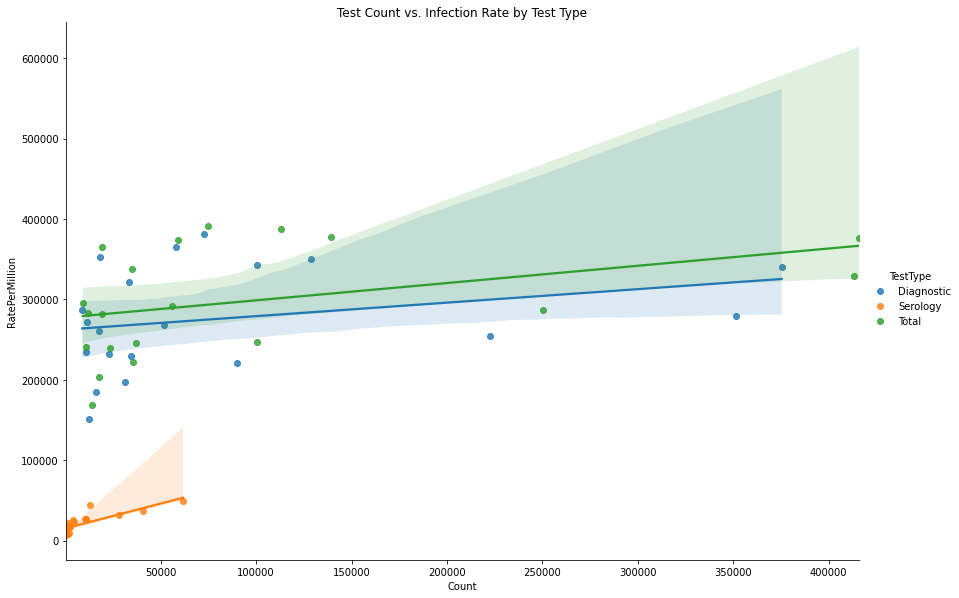

In [ ]:
CBC_TotalSEQuant2 = CovidByCounty_TotalSE.drop(['COUNTY' , 'Updated' , 'Region'] , axis = 1)
CBC_TotalSEQuant2
sns.lmplot(x = 'Count' , y = 'RatePerMillion', data = CBC_TotalSEQuant2 , fit_reg= True , hue = 'TestType' , height = 8 , aspect = 1.5)
plt.title('Test Count vs. Infection Rate by Test Type')
plt.show()

Adding back in the Test Type variable, you can see from the scatterplot above that diagnostic and Total test counts are more linear and are parallel to one another since diagnostic testing makes up 92% of the total. An interesting observation is in the lower left with the Serology test and infection rate plot points. There appears to be a stronger positive correlation between the number of tests administerred and the rate of infection

**Step 6: Conclusion**

From the data, it's clear to see that the majority of the data points collected occured in the southeast region of the state, specifically in Wayne, Oakland, and Macomb counties. According to the 2010 census, these three counties have the most people living in them respectively, and further solidifies this observation. Looking at this segment of the data specifically, there was a positive correlation between the number of tests administered and the infection rate per million. When there is a higher infection rate, there's an increase in the amount of testing done. While the overall number of Serology tests completed across the state was small in comparison to the Diagnostic testing, almost 80% of all tests done were completed in the Southeast region. Serology testing also appears to have a stronger link to the rate of infection than diagnostic testing. This again ties back to the southeast region having the highest population of all the regions. Also something anecdotal to consider: there several hospital systems in the southeast that are currently are conducting research into trying to find cure to covid; the antibody testing that the serology tests look for would be valuable information to that research. Unfortunately, we cannot see the rate of testing broken out by hospitals, but this would be interesting data to analyze. 

**Miscellaneous Data/Code Not Used in Analysis**

The data and coding in this section was not ultimately used in my analysis above, but I thought I would keep it in here just in case anyone wanted to see some other techniques I was playing around with from the Mobi Boot Camp Libraries page.

In [ ]:
CovidByCounty_Pivot = pd.pivot_table(CovidByCounty_df2, index= 'COUNTY', values= ['Count' , 'RatePerMillion'] , columns= 'TestType' , aggfunc= np.sum)

CovidByCounty_Pivot.head()

In [ ]:
CovidByCounty_Pivot2 = pd.pivot_table(CovidByCounty_df2, index= 'Region', values= 'Count' , columns= 'TestType' , aggfunc= np.sum)
CovidByCounty_Pivot2

Something to point out here: when I create a pivot table that looks at the total number of tests done by region, we can clearly see that most of the testing is happening in the Southeast part of the state. This isn't that surprising, given that four of the five most heavily populated counties are in Southeast Michigan (based on 2010 census). The next highest amount is happening in the Southwest part of the state, where the Grand rapids metropolitan area is.

In [ ]:
pd.pivot_table(CovidByCounty_df2, index= 'Region', values= 'Count' , columns= 'TestType', aggfunc= np.mean).plot.barh(stacked = False)

The bar chart above is looking at the average number of tests per region

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['DSE6000Lab1.csv']))

print(df)
for col in df.columns:
  print(col)

In [ ]:
corr = pd.DataFrame(df).corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(200, 20, n=100))

NameError: ignored

In [ ]:
sns.lmplot(x='Total Rate Per Million', y='Total Tests', data=df)

NameError: ignored

In [ ]:
Counties_By_Region = {'Midland':'Southeast' , 'Bay':'Southeast' , 'Saginaw':'Southeast' , 'Shiawassee':'Southeast' , 'Ingham':'Southeast' , 'Jackson':'Southeast' , 'Hillsdale':'Southeast' , 'Lenawee':'Southeast' , 'Monroe':'Southeast' , 'Wayne':'Southeast' , 'Macomb':'Southeast' , 'St Clair':'Southeast' , 'Sanilac':'Southeast' , 'Huron':'Southeast' , 'Tuscola':'Southeast' , 'Genesee':'Southeast' , 'Livingston':'Southeast' , 'Washtenaw':'Southeast' , 'Oakland':'Southeast' , 'Lapeer':'Southeast' , 'Isabella':'Southwest' , 'Mecosta':'Southwest' , 'Newaygo':'Southwest' , 'Oceana':'Southwest' , 'Muskegon':'Southwest' , 'Ottawa':'Southwest' , 'Allegan':'Southwest' , 'Van Buren':'Southwest' , 'Berrien':'Southwest' , 'Cass':'Southwest' , 'St Joseph':'Southwest' , 'Branch':'Southwest' , 'Calhoun':'Southwest' , 'Eaton':'Southwest' , 'Clinton':'Southwest' , 'Gratiot':'Southwest' ,'Montcalm':'Southwest' , 'Kent':'Southwest' , 'Ionia':'Southwest' , 'Barry':'Southwest' , 'Kalamazoo':'Southwest' , 'Arenac':'Northeast' , 'Gladwin':'Northeast' , 'Roscommon':'Northeast' , 'Crawford':'Northeast' , 'Otsego':'Northeast' , 'Cheboygan':'Northeast' , 'Presque Isle':'Northeast' , 'Alpena':'Northeast' , 'Alcona':'Northeast' , 'Iosco':'Northeast' , 'Ogemaw':'Northeast' , 'Oscoda':'Northeast' , 'Montmorency':'Northeast' , 'Clare':'Northwest' ,  'Osceola':'Northwest' , 'Lake':'Northwest' , 'Mason':'Northwest' , 'Manistee':'Northwest' , 'Benzie':'Northwest' , 'Leelanau':'Northwest' , 'Emmet':'Northwest' , 'Charlevoix':'Northwest' , 'Antrim':'Northwest' , 'Kalkaska':'Northwest' , 'Missaukee':'Northwest' , 'Wexford':'Northwest' , 'Grand Traverse':'Northwest' , 'Chippewa':'Upper Peninsula' ,  'Mackinac':'Upper Peninsula' , 'Luce':'Upper Peninsula' , 'Schoolcraft':'Upper Peninsula' , 'Alger':'Upper Peninsula' , 'Delta':'Upper Peninsula' , 'Menominee':'Upper Peninsula' , 'Dickinson':'Upper Peninsula' , 'Marquette':'Upper Peninsula' , 'Iron':'Upper Peninsula' , 'Baraga':'Upper Peninsula' , 'Houghton':'Upper Peninsula' , 'Keweenaw':'Upper Peninsula' , 'Ontonagon':'Upper Peninsula' , 'Gogebic':'Upper Peninsula'}
df["Region"] = df['County'].map(Counties_By_Region)
df

NameError: ignored

In [ ]:
df.hist(by = 'Region' , column= 'Total Tests' , figsize= [20,40])

NameError: ignored